# Goods Recommandation by the Tompson Sampling-based AI engine

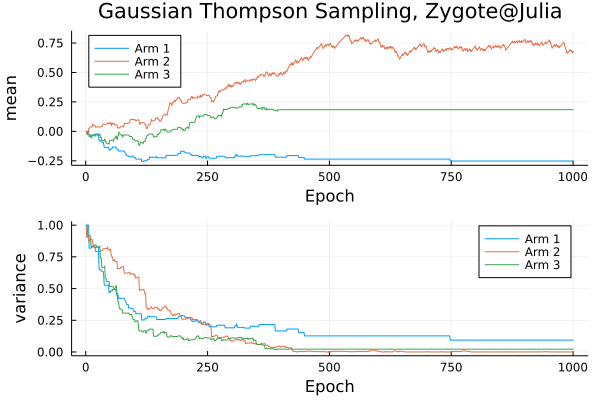

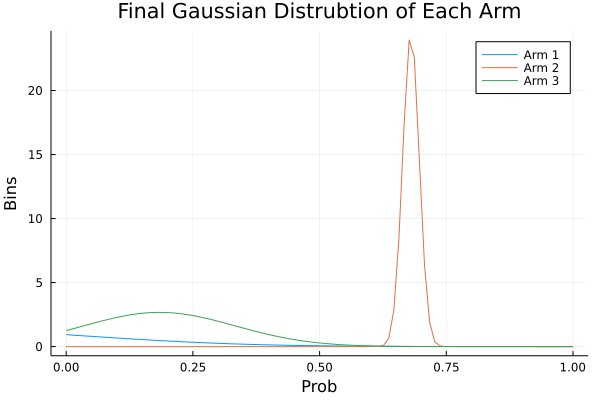

[0.3, 0.7, 0.5]


In [1]:
## Declare Packages tu Use 
using Distributions
using Formatting
using Plots
using Zygote
using Random

## Basic Functions
function cost_ts(S, F)
    probs = rand.(Normal.(S, abs.(F)))
    p_arm = argmax(probs)
    rand(Uniform())<means[p_arm] ? (1-probs[p_arm])^2 : (0 -probs[p_arm])^2
end

## Training
N = 3
means = [0.3, 0.7, 0.5] # rand(N)
disp = false 
Nepoch = 1000
proposal_arm_array = zeros(Nepoch)
probs_array = zeros(Nepoch, N)
S = zeros(Float64, N)
F = ones(Float64, N)
S_list = zeros(Float64, Nepoch+1, N)
S_list[1,:] = S
F_abs_list = zeros(Float64, Nepoch+1, N)
F_abs_list[1,:] = abs.(F)

μ = 0.01
for epoch in range(1, Nepoch)
    G_all = gradient(cost_ts, S, F)
    S -= μ * G_all[1]
    F -= μ * G_all[2]    
    S_list[epoch+1,:] = S    
    F_abs_list[epoch+1,:] = F.^2
end

## Result Plotting
println(means)
p1 = plot(range(1,Nepoch+1), S_list, ylabel="mean", 
    title = "Gaussian Thompson Sampling, Zygote@Julia", legend=:topleft,
    label = ["Arm 1" "Arm 2" "Arm 3"])
p2 = plot(range(1,Nepoch+1), F_abs_list, ylabel="variance",
    label = ["Arm 1" "Arm 2" "Arm 3"])
h = plot(p1, p2, xlabel="Epoch", layout = (2,1))
display(h)

lo, hi = 0., 1.
x = range(lo, hi; length = 100)
Y = []
for i in range(1,N)
    y = pdf.(Normal(S[i],abs.(F[i])),x)
    if i == 1
        Y = y
    else
        Y = [Y y]
    end
end

h = plot(x, Y, xlabel = "Prob", ylabel = "Bins", 
    title = "Final Gaussian Distrubtion of Each Arm", 
    label = ["Arm 1" "Arm 2" "Arm 3"])
display(h)